In [46]:
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
# Word Cloud
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michellenkou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michellenkou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michellenkou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
#pip install WordCloud

# ETAPE 1 IMPORTATION DES DONNEES

In [2]:
Com_pos = pd.read_pickle(r'data/imdb_raw_pos.pickle')
Com_neg = pd.read_pickle(r'data/imdb_raw_neg.pickle')

In [3]:
print('Nb_avis positifs ',len(Com_pos))
print('Nb_avis négatifs', len(Com_neg))

Nb_avis positifs  12500
Nb_avis négatifs 12500


#### Dictionnaire
    - le dictionnaire nous permettra de creer le dataframe

In [48]:
positif = {'Avis': Com_pos}
negatif = {'Avis': Com_neg}

### Création du dataframe pour les données positives

In [5]:
# Creates pandas DataFrame.
df1 = pd.DataFrame(positif)
df1.head(4)

,Avis
0,I went and saw this movie last night after bei...
1,Actor turned director Bill Paxton follows up h...
2,As a recreational golfer with some knowledge o...
3,"I saw this film in a sneak preview, and it is ..."


In [6]:
df1['Commentaire'] = 'positif'
df1.head(4)

,Avis,Commentaire
0,I went and saw this movie last night after bei...,positif
1,Actor turned director Bill Paxton follows up h...,positif
2,As a recreational golfer with some knowledge o...,positif
3,"I saw this film in a sneak preview, and it is ...",positif


In [7]:
df1['Reponse'] = 1
df1.head(4)

,Avis,Commentaire,Reponse
0,I went and saw this movie last night after bei...,positif,1
1,Actor turned director Bill Paxton follows up h...,positif,1
2,As a recreational golfer with some knowledge o...,positif,1
3,"I saw this film in a sneak preview, and it is ...",positif,1


### Création du dataframe pour les données negatives

In [8]:
df2 = pd.DataFrame(negatif)
df2.tail(4)

,Avis
12496,When all we have anymore is pretty much realit...
12497,The basic genre is a thriller intercut with an...
12498,Four things intrigued me as to this film - fir...
12499,David Bryce's comments nearby are exceptionall...


In [9]:
df2['Commentaire'] = 'Negatif'
df2.tail(4)

,Avis,Commentaire
12496,When all we have anymore is pretty much realit...,Negatif
12497,The basic genre is a thriller intercut with an...,Negatif
12498,Four things intrigued me as to this film - fir...,Negatif
12499,David Bryce's comments nearby are exceptionall...,Negatif


In [10]:
df2['Reponse'] = 0
df2.tail(4)

,Avis,Commentaire,Reponse
12496,When all we have anymore is pretty much realit...,Negatif,0
12497,The basic genre is a thriller intercut with an...,Negatif,0
12498,Four things intrigued me as to this film - fir...,Negatif,0
12499,David Bryce's comments nearby are exceptionall...,Negatif,0


# Création du dataframe mixtes positives et négatives 

In [51]:
data_new = pd.concat([df1, df2])
data_new.tail(4)

,Avis,Commentaire,Reponse
12496,When all we have anymore is pretty much realit...,Negatif,0
12497,The basic genre is a thriller intercut with an...,Negatif,0
12498,Four things intrigued me as to this film - fir...,Negatif,0
12499,David Bryce's comments nearby are exceptionall...,Negatif,0


## Mélange des données 

In [52]:
data_mixte = data_new.sample(frac=1).reset_index()
data_mixte = data_mixte.drop(['index'], axis=1)
data_mixte.head(4)

,Avis,Commentaire,Reponse
0,"Postwar England, the dawn of the ""atomic age""....",positif,1
1,***Minor Plot Spoilers***<br /><br />I must co...,Negatif,0
2,"""Goodbye, Mr. Chips"" is a superbly written and...",positif,1
3,Normally I wouldn't go to the trouble of comme...,Negatif,0



# Visualisation des avis

<AxesSubplot:xlabel='Reponse', ylabel='count'>

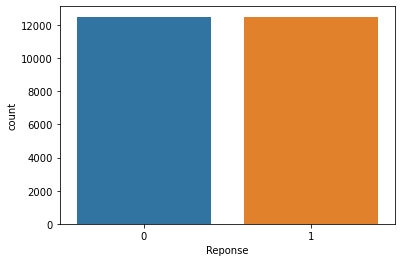

In [13]:
sns.countplot(x='Reponse', data=data_mixte)

# PREPROCESSING

1. #### Nettoyage des données

In [53]:
def Cleaner_data(txt):
    # Conversion des textes majuscule en minuscule
    txt = txt.lower()
    # suppression de la ponctuaction 
    puncts = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    txt = txt.translate(puncts)
    # regex
    txt = re.sub(r'\d+', '', txt)
    txt = re.sub('https?://\S+|www\.\S+', '', txt)
    txt = re.sub('\n', '', txt)

    return txt

In [55]:
data_mixte["Avis_nettoyer"] = data_mixte["Avis"].apply(lambda Text: Cleaner_data(Text))

In [57]:
data_mixte.head(5)

,Avis,Commentaire,Reponse,Avis_nettoyer
0,"Postwar England, the dawn of the ""atomic age""....",positif,1,postwar england the dawn of the atomic age ...
1,***Minor Plot Spoilers***<br /><br />I must co...,Negatif,0,minor plot spoilers br br i must co...
2,"""Goodbye, Mr. Chips"" is a superbly written and...",positif,1,goodbye mr chips is a superbly written and...
3,Normally I wouldn't go to the trouble of comme...,Negatif,0,normally i wouldn t go to the trouble of comme...
4,Mild spoiler in the second paragraph.<br /><br...,Negatif,0,mild spoiler in the second paragraph br br...


In [59]:
data_mixte.describe()

,Reponse
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


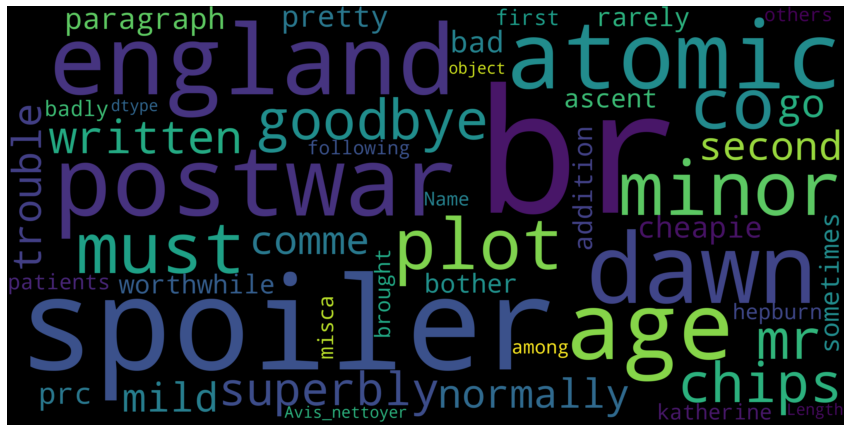

In [60]:
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(data_mixte["Avis_nettoyer"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#### 2. Création de la variable explicative et expliquée

In [63]:
X = data_mixte.Avis_nettoyer
y = data_mixte.Reponse

In [64]:
X 

0        postwar england  the dawn of the  atomic age  ...
1           minor plot spoilers    br    br   i must co...
2         goodbye  mr  chips  is a superbly written and...
3        normally i wouldn t go to the trouble of comme...
4        mild spoiler in the second paragraph  br    br...
                               ...                        
24995    pretty bad prc cheapie which i rarely bother t...
24996    the ascent is a very worthwhile addition to re...
24997    sometimes you just have to have patients when ...
24998    first of all  katherine hepburn is badly misca...
24999    brought to you by the following among others  ...
Name: Avis_nettoyer, Length: 25000, dtype: object

In [65]:
y

0        1
1        0
2        1
3        0
4        0
        ..
24995    0
24996    1
24997    0
24998    0
24999    0
Name: Reponse, Length: 25000, dtype: int64

#### 3. Division des données d'entrainement et teste

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.2)

In [66]:
print('len X train :', len(X_train))
print('len y train :', len(y_train))
print('len X test :', len(X_test))
print('len y test :', len(y_test))

len X train : 20000
len y train : 20000
len X test : 5000
len y test : 5000


#### 4. Conversion des Données qualitatives en quantitatives 

In [67]:
Vecteurs = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 4)

In [68]:
Vecteurs

CountVectorizer(max_df=0.8, min_df=4, stop_words='english')

#### 5. Transformation

In [69]:
Vecteurs.fit(X_train)

CountVectorizer(max_df=0.8, min_df=4, stop_words='english')

In [70]:
Vecteurs

CountVectorizer(max_df=0.8, min_df=4, stop_words='english')

In [71]:
X_train_Vecteurs = Vecteurs.transform(X_train)
X_test_Vecteurs = Vecteurs.transform(X_test)

In [72]:
X_train_Vecteurs

<20000x26972 sparse matrix of type '<class 'numpy.int64'>'
	with 1693560 stored elements in Compressed Sparse Row format>

#### 6. Normalisation des données

In [73]:
Trans = MaxAbsScaler().fit(X_train_Vecteurs)

In [77]:
Trans_Xtrain = Trans.transform(X_train_Vecteurs)
Trans_Xtest = Trans.transform(X_test_Vecteurs)

# ENTRAINEMENT DES MODELES
    - Pour ce projet, on entrainera 3 modeles:
        1. Regression logistique
        2. Naive Baiyes
        3. Support vector machine

### Modèle 1 : régression logistique 

In [76]:
Reg = LogisticRegression()

#### Entrainement du LG

In [80]:
Reg.fit(Trans_Xtrain, y_train)

LogisticRegression()

#### Prédiction du modèle de régression logistique

In [87]:
y_pred = Reg.predict(X_test_Vecteurs)

In [104]:
print("\n Mon modèle de régression a un score d'accuracy de : ",metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')


 Mon modèle de régression a un score d'accuracy de : 85.22%


#### Matrice de confusion

In [89]:
print('Matrice de confusion :',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Matrice de confusion :
[[2190  309]
 [ 373 2128]]


In [90]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)

In [92]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):
    
    plt.imshow(cm, interpolation = "nearest", cmap = cmap)
    plt.title(title, pad = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalized:
        cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Unnormalized Confusion Matrix")

    threshold = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

    plt.tight_layout()
    plt.xlabel("Predicted Label", labelpad = 20)
    plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


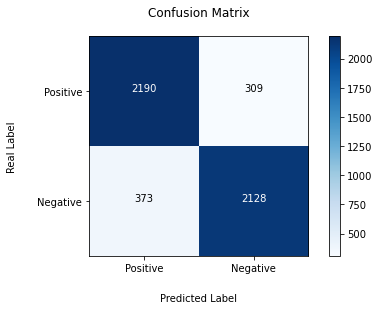

In [108]:
plot_cm(ConfusionMatrix, classes = ["Positive", "Negative"], title = "Confusion Matrix")

### Modèle 2 : NAIVE BAYES 

In [100]:
Bayes = MultinomialNB()

#### Entrainement du modele

In [101]:
Bayes.fit(Trans_Xtrain, y_train)

MultinomialNB()

### Predictions

In [105]:
y_pred = Bayes.predict(X_test_Vecteurs) 

In [106]:
print("\n Mon modèle de régression a un score d'accuracy de : ",metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')


 Mon modèle de régression a un score d'accuracy de : 85.22%


#### Matrice de confusion

In [110]:
ConfusionMatrix_nb = confusion_matrix(y_test, y_pred)

In [107]:
print('Matrice de confusion :',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Matrice de confusion :
[[2276  223]
 [ 516 1985]]


Unnormalized Confusion Matrix


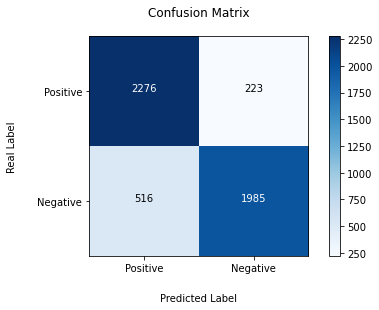

In [111]:
plot_cm(ConfusionMatrix_nb, classes = ["Positive", "Negative"], title = "Confusion Matrix")

### Modèle 3 : support machine vector 

In [114]:
Support_vec = LinearSVC()

#### Entrainement

In [115]:
Support_vec.fit(Trans_Xtrain, y_train)

LinearSVC()

#### Prédiction du modèle support vector

In [116]:
y_pred3 = Support_vec.predict(X_test_Vecteurs)

In [117]:
print("\n Mon modèle de support vector machine a un score d'accuracy de:",metrics.accuracy_score(y_test,y_pred3)*100,'%',sep='')


 Mon modèle de support vector machine a un score d'accuracy de:85.88%


### Matrice de confusion

In [118]:
print('Matrice de Confusion: ',metrics.confusion_matrix(y_test,y_pred3), sep = '\n')

Matrice de Confusion: 
[[2132  367]
 [ 339 2162]]


In [121]:
ConfusionMatrix_svm = confusion_matrix(y_test, y_pred3)

Unnormalized Confusion Matrix


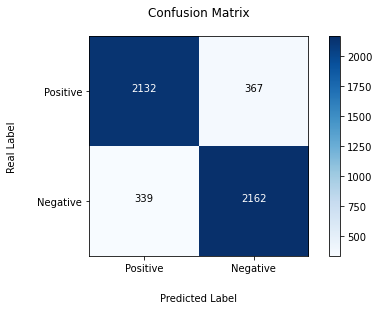

In [122]:
plot_cm(ConfusionMatrix_svm, classes = ["Positive", "Negative"], title = "Confusion Matrix")

# Teste du modèle de régression logistique 

In [123]:
def test_model():
    test_model = []
    test_model.append(input())
    test_Vecteurs = Vecteurs.transform(test_model)
    predLabel = Reg.predict(test_Vecteurs)
    Classes = ['Negative','Positive']
    print("Votre commentaire est ",Classes[predLabel[0]])

In [129]:
test_model()

my name is Michelle, I'm camerounian, I live in Paris and I work in carrefour
Votre commentaire est  Positive
